# **Data & Standardisation**

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_html
import html5lib
from mpl_toolkits import mplot3d
import plotly.express as px
import scipy.linalg as la
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
dataset = '/content/drive/MyDrive/Guns.csv'
dataset = pd.read_csv(dataset,index_col=0)

n,p = dataset.shape
print(np.mean(dataset[['murder']]))
print(dataset[dataset['state']=='Georgia']['murder'])
dataset

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


FileNotFoundError: ignored

In [ ]:
df = pd.DataFrame(dataset) #****
df = df.iloc[:,1:-2]
n,p = df.shape
df


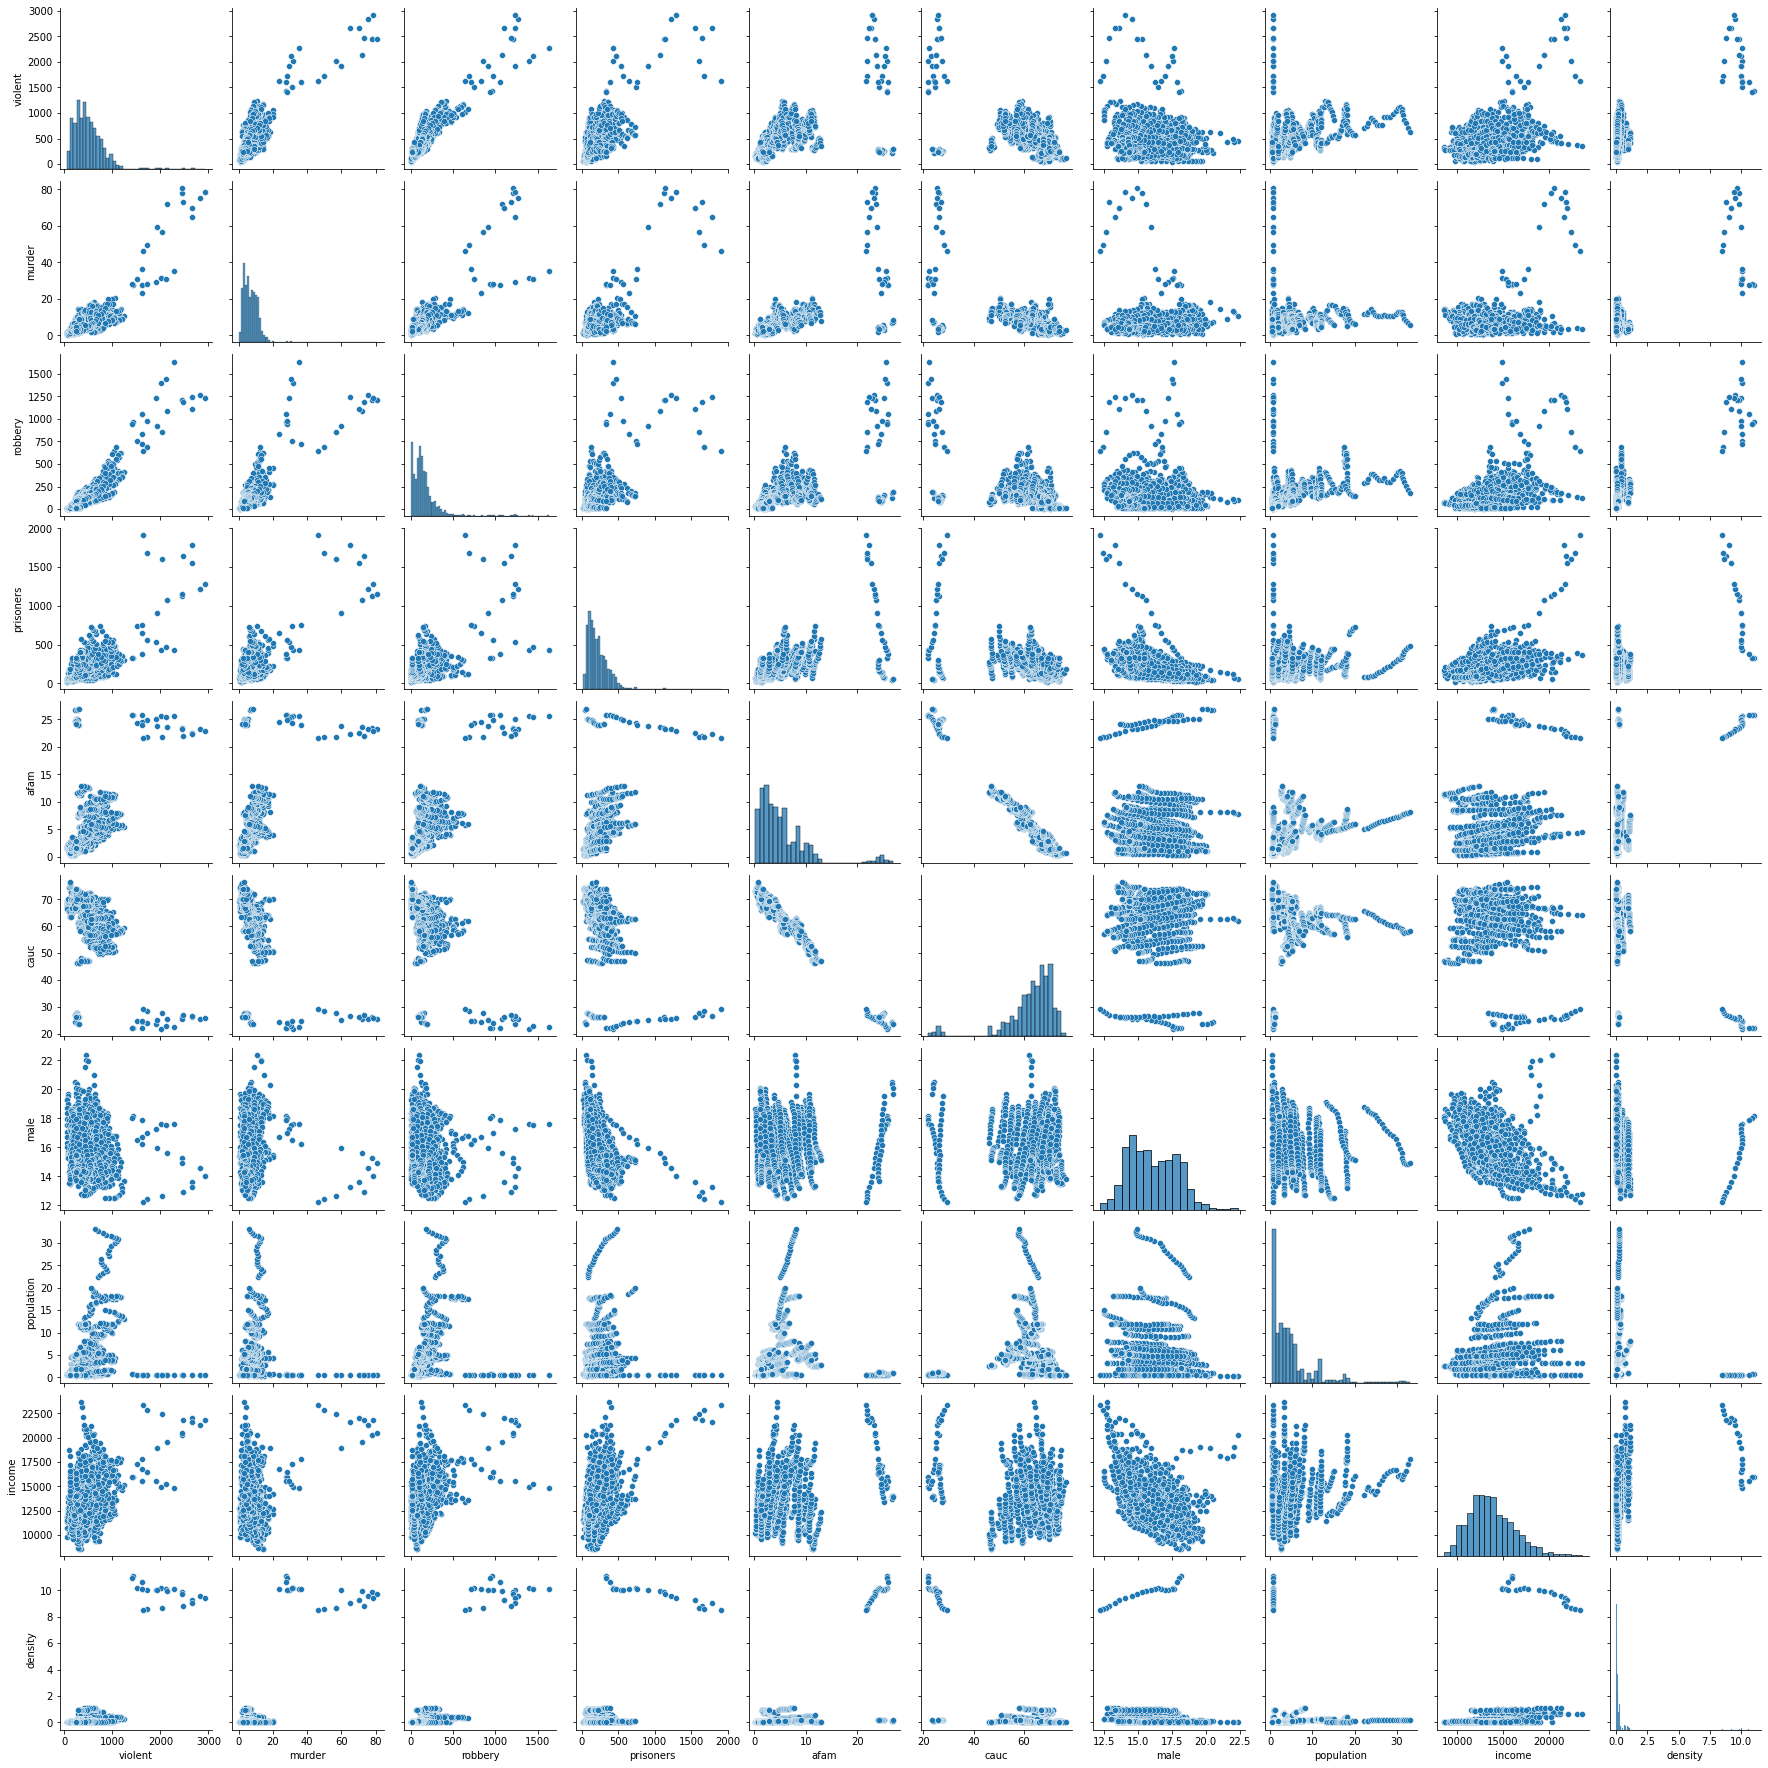

In [ ]:
#relation 2 à 2
import seaborn as sns
sns.pairplot(df)

In [ ]:
print("Variance :",np.std(df.values,axis=0,ddof=0))
print("Moyenne :",np.mean(df.values,axis=0))

In [ ]:
X = df.values
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,414.4,14.2,96.8,83.0,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552
1,419.1,13.3,99.1,94.0,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567
2,413.3,13.2,109.5,144.0,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245
3,448.5,13.2,132.1,141.0,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829
4,470.5,11.9,126.5,149.0,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187
...,...,...,...,...,...,...,...,...,...,...
1168,254.2,2.1,17.9,254.0,1.485849,73.71621,15.37098,0.478447,14070.160,0.004927
1169,249.7,3.3,20.4,289.0,1.521814,73.85796,15.44601,0.480085,14032.230,0.004944
1170,255.2,3.5,17.7,310.0,1.527818,73.92731,15.49400,0.480031,14790.980,0.004943
1171,247.6,4.8,16.2,326.0,1.558396,73.98515,15.51021,0.480045,15225.510,0.004944


In [ ]:
#Z est la matrice centré réduite, On fera une ACP NORME
moyennes = np.mean(X,axis=0)
sigmas= np.std(X,axis=0,ddof=0)

Z = (X - moyennes)/sigmas
pd.DataFrame(Z)

# ***ACP Normé***

In [ ]:
#PCA automatique
pca = PCA()
pca_dataZ = pca.fit_transform(Z)
pd.DataFrame(pca_dataZ)
dota = pd.DataFrame(pca_dataZ)
dota
#fig = px.scatter_3d(dota, x=0, y=1, z=2, text=dataset['state'], title="3D Scatter Plot")
#fig.show()

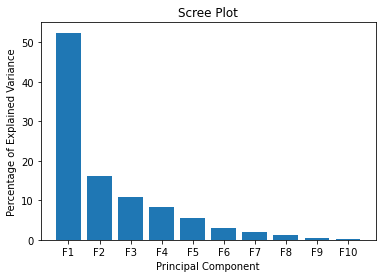

In [ ]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['F' + str(x) for x in range(1, len(per_var)+1)]
#-----
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Interpretation*

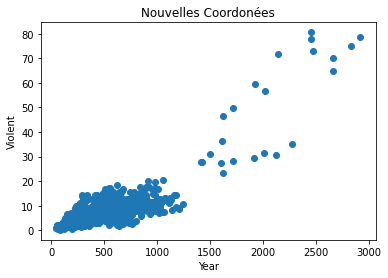

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.title('Nouvelles Coordonées')
plt.xlabel("Violent")
plt.ylabel("Murder")
plt.show()

In [ ]:
plt.scatter(pca_dataZ[:,0],pca_dataZ[:,1])
plt.title('Nouvelles Coordonées')
plt.xlabel("X'")
plt.ylabel("Y'")
plt.show()

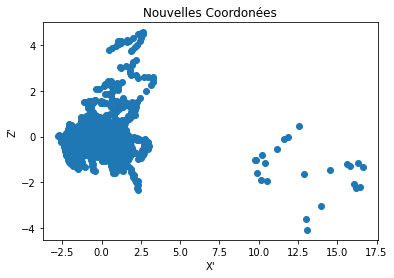

In [ ]:
plt.scatter(pca_dataZ[:,0],pca_dataZ[:,2])
plt.title('Nouvelles Coordonées')
plt.xlabel("X'")
plt.ylabel("Z'")
plt.show()

In [ ]:
#variance expliqué par les axes
pca.explained_variance_ratio_

array([0.52442064, 0.16174003, 0.10845709, 0.08392676, 0.05430793,
       0.0303042 , 0.02055425, 0.01054803, 0.00450382, 0.00123723])

In [ ]:
# lambdas
pca.explained_variance_ 

array([5.24868101, 1.61878034, 1.0854963 , 0.83998374, 0.54354266,
       0.30330056, 0.20571793, 0.10557034, 0.04507667, 0.01238286])

In [ ]:
#calculer les lambdas
lambada = np.mean(np.power(pca_dataZ,2),axis=0)
print(lambada)

[5.24420643 1.61740031 1.0845709  0.83926764 0.54307928 0.30304199
 0.20554255 0.10548034 0.04503824 0.0123723 ]


In [ ]:
np.sum(lambada)

10.0

In [ ]:
#matrice des variance covariance
V = np.cov(X,ddof=0,rowvar=False)
pd.DataFrame(V)

In [ ]:
w,v = la.eig(V)
print(w)
print()
print(v)

[6.55109439e+06+0.j 1.23275056e+05+0.j 1.49882914e+04+0.j
 3.53503826e+03+0.j 6.98009037e+01+0.j 2.41677243e+01+0.j
 1.07186505e+01+0.j 1.48085221e+00+0.j 3.39879843e-01+0.j
 5.19001186e-01+0.j]

[[-5.43652137e-02  8.59241756e-01 -1.76270718e-01  4.77046882e-01
   4.99144298e-03 -5.65328193e-03  6.40737601e-03 -3.57532245e-04
   1.70180881e-03  1.40801287e-03]
 [-6.71256774e-04  1.78657521e-02  7.58129539e-03 -2.06423884e-02
   7.52573077e-02 -2.87259259e-01 -9.38778205e-01  1.59552622e-01
  -2.85934765e-02 -5.86181863e-02]
 [-2.81327333e-02  3.97945998e-01 -3.46620415e-01 -8.47848064e-01
  -3.73279776e-02  3.41969637e-03  1.95991307e-02 -1.73383005e-03
  -6.29293109e-03 -4.86561549e-03]
 [-3.26665247e-02  3.13097197e-01  9.21084016e-01 -2.27087692e-01
  -2.48631166e-02  1.10953967e-02  1.17565639e-02 -7.51640935e-03
  -1.46103033e-03  5.73327144e-04]
 [-5.10949198e-04  7.41447436e-03  4.04673593e-03 -1.60272846e-02
   4.43657632e-01  3.66402576e-02  1.39830013e-02 -2.46238349e-01
   4

In [ ]:
#quantité total d'information
trace = V.trace()
print(trace)

6692999.798251775


In [ ]:
#matrice var-cov matriciellement vv= 1/n (ct * c)
C = X - moyennes
VV = np.dot(np.transpose(C),C)/n
print(pd.DataFrame(VV))

               0            1  ...             8            9
0  111645.981209  2076.624812  ...  3.480929e+05   300.932780
1    2076.624812    56.542919  ...  4.234768e+03     7.626756
2   51657.148073  1022.214558  ...  1.805437e+05   180.544486
3   41981.988165   954.122345  ...  2.106949e+05   135.505325
4     929.770185    22.100664  ...  3.275813e+03     3.594520
5   -1868.197424   -45.149910  ... -4.762839e+03    -7.338708
6     -98.144427     0.195018  ... -2.333683e+03    -0.149467
7     559.520022     3.944580  ...  2.884843e+03    -0.554969
8  348092.895078  4234.767716  ...  6.520123e+06  1187.645098
9     300.932780     7.626756  ...  1.187645e+03     1.835738

[10 rows x 10 columns]


In [ ]:
#matrice correlation matriciellement vv= 1/n (rt * r)
R = Z
CORR = np.dot(np.transpose(R),R)/n
print(pd.DataFrame(CORR))

          0         1         2  ...         7         8         9
0  1.000000  0.826509  0.907077  ...  0.318966  0.407986  0.664726
1  0.826509  1.000000  0.797606  ...  0.099922  0.220553  0.748592
2  0.907077  0.797606  1.000000  ...  0.317193  0.414849  0.781834
3  0.702660  0.709608  0.566850  ...  0.095341  0.461456  0.559313
4  0.569788  0.601833  0.581202  ...  0.058076  0.262694  0.543244
5 -0.573019 -0.615368 -0.584192  ... -0.065438 -0.191164 -0.555113
6 -0.169647  0.014979 -0.086037  ... -0.097503 -0.527856 -0.063715
7  0.318966  0.099922  0.317193  ...  1.000000  0.215201 -0.078022
8  0.407986  0.220553  0.414849  ...  0.215201  1.000000  0.343284
9  0.664726  0.748592  0.781834  ... -0.078022  0.343284  1.000000

[10 rows x 10 columns]


In [ ]:
COR = np.corrcoef(X,rowvar=False)
print(pd.DataFrame(COR))

          0         1         2  ...         7         8         9
0  1.000000  0.826509  0.907077  ...  0.318966  0.407986  0.664726
1  0.826509  1.000000  0.797606  ...  0.099922  0.220553  0.748592
2  0.907077  0.797606  1.000000  ...  0.317193  0.414849  0.781834
3  0.702660  0.709608  0.566850  ...  0.095341  0.461456  0.559313
4  0.569788  0.601833  0.581202  ...  0.058076  0.262694  0.543244
5 -0.573019 -0.615368 -0.584192  ... -0.065438 -0.191164 -0.555113
6 -0.169647  0.014979 -0.086037  ... -0.097503 -0.527856 -0.063715
7  0.318966  0.099922  0.317193  ...  1.000000  0.215201 -0.078022
8  0.407986  0.220553  0.414849  ...  0.215201  1.000000  0.343284
9  0.664726  0.748592  0.781834  ... -0.078022  0.343284  1.000000

[10 rows x 10 columns]


In [ ]:
print(COR.trace())

10.0


In [ ]:
w,v = la.eig(COR)
w

array([5.24420643+0.j, 1.61740031+0.j, 1.0845709 +0.j, 0.83926764+0.j,
       0.54307928+0.j, 0.30304199+0.j, 0.20554255+0.j, 0.10548034+0.j,
       0.04503824+0.j, 0.0123723 +0.j])

In [ ]:
v

array([[ 3.94796860e-01,  5.17106859e-02, -2.06482437e-01,
        -1.98978845e-01,  1.23998736e-01,  2.67528292e-02,
        -5.71643507e-01, -2.68145835e-01, -5.86593208e-01,
        -1.92973067e-02],
       [ 3.82434872e-01, -1.59654021e-01, -3.81996369e-02,
        -2.95977050e-01,  2.49627887e-01,  2.37851144e-01,
         5.22365099e-02,  7.85706222e-01,  1.10681246e-02,
        -1.09482484e-02],
       [ 3.91771169e-01, -1.04453564e-02, -2.36878365e-01,
        -2.40422165e-01, -1.91504219e-01, -2.77485895e-01,
        -2.87459826e-01, -1.40633769e-01,  7.17977612e-01,
         3.02806854e-02],
       [ 3.48644093e-01,  2.06941892e-01,  2.19887412e-01,
        -2.30863071e-02,  5.08189860e-01,  4.38953675e-01,
         3.03601271e-01, -4.42900785e-01,  2.16587279e-01,
         2.35955303e-02],
       [ 3.43149782e-01, -2.55180028e-01,  1.16790018e-01,
         5.47669522e-01, -8.68343980e-02, -8.07877251e-03,
        -4.27278325e-02,  1.59094158e-02,  2.03213438e-02,
        -7.

In [ ]:
np.linalg.norm(v[:,3])

1.0

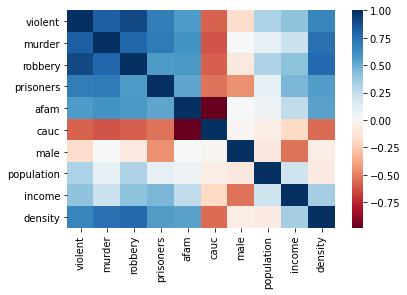

In [ ]:
sns.heatmap(CORR,xticklabels=df.columns,yticklabels=df.columns,cmap="RdBu")

In [ ]:
#correlation entre les variables et les facteurs
Mlambda = np.corrcoef(pca_dataZ,Z,rowvar=False)[:p,p:]
print(pd.DataFrame(Mlambda))

          0         1         2  ...         7         8         9
0  0.904094  0.875785  0.897165  ...  0.211299  0.492898  0.808803
1 -0.065764  0.203043  0.013284  ... -0.347418 -0.661106  0.148034
2  0.215036  0.039782  0.246692  ...  0.862502 -0.111072 -0.180532
3 -0.182288 -0.271149 -0.220254  ...  0.233215  0.093368 -0.344353
4 -0.091380 -0.183961  0.141127  ... -0.068701  0.485492  0.229337
5 -0.014727 -0.130935  0.152754  ...  0.039207 -0.247773  0.210142
6 -0.259165  0.023682 -0.130325  ...  0.172342 -0.011863  0.264347
7 -0.087088  0.255180 -0.045675  ...  0.010907  0.039297 -0.048640
8 -0.124488  0.002349  0.152371  ... -0.016350 -0.007011 -0.060961
9 -0.002146 -0.001218  0.003368  ... -0.003190  0.010359 -0.005976

[10 rows x 10 columns]


In [ ]:
slambda = np.sum(Mlambda**2,axis=1)
slambda

array([5.24420643, 1.61740031, 1.0845709 , 0.83926764, 0.54307928,
       0.30304199, 0.20554255, 0.10548034, 0.04503824, 0.0123723 ])

In [ ]:
#coordonnées factorielles sur les facteurs #produit matriciel 
c1 = np.dot(Z,v)
print(pd.DataFrame(c1))

             0         1         2  ...         7         8         9
0    -0.264330 -2.365258 -0.335431  ...  0.743748 -0.166874  0.020077
1    -0.239119 -2.184715 -0.284150  ...  0.658773 -0.160929  0.033478
2    -0.126700 -2.076301 -0.212916  ...  0.539040 -0.048083  0.038960
3    -0.047654 -2.113069 -0.265657  ...  0.499138 -0.016559  0.029347
4    -0.076046 -2.050850 -0.244874  ...  0.339262 -0.071624  0.016512
...        ...       ...       ...  ...       ...       ...       ...
1168 -1.603303  0.771320  0.992276  ... -0.258296  0.027599 -0.190582
1169 -1.483150  0.751676  1.012354  ... -0.230405  0.092340 -0.201295
1170 -1.372316  0.910745  1.059871  ... -0.234492  0.088111 -0.176214
1171 -1.251535  0.982966  1.095029  ... -0.112663  0.111422 -0.167991
1172 -1.348020  1.155053  1.148232  ... -0.333829  0.125778 -0.157241

[1173 rows x 10 columns]


In [ ]:
print(pd.DataFrame(pca_dataZ))

             0         1         2  ...         7         8         9
0    -0.264330  2.365258  0.335431  ...  0.743748 -0.166874  0.020077
1    -0.239119  2.184715  0.284150  ...  0.658773 -0.160929  0.033478
2    -0.126700  2.076301  0.212916  ...  0.539040 -0.048083  0.038960
3    -0.047654  2.113069  0.265657  ...  0.499138 -0.016559  0.029347
4    -0.076046  2.050850  0.244874  ...  0.339262 -0.071624  0.016512
...        ...       ...       ...  ...       ...       ...       ...
1168 -1.603303 -0.771320 -0.992276  ... -0.258296  0.027599 -0.190582
1169 -1.483150 -0.751676 -1.012354  ... -0.230405  0.092340 -0.201295
1170 -1.372316 -0.910745 -1.059871  ... -0.234492  0.088111 -0.176214
1171 -1.251535 -0.982966 -1.095029  ... -0.112663  0.111422 -0.167991
1172 -1.348020 -1.155053 -1.148232  ... -0.333829  0.125778 -0.157241

[1173 rows x 10 columns]


# **Interpretation**

**Etude des variables**

In [ ]:
#corrélation des variables avec les facteur 
corvar = np.sqrt(w)*v
print(pd.DataFrame(corvar))


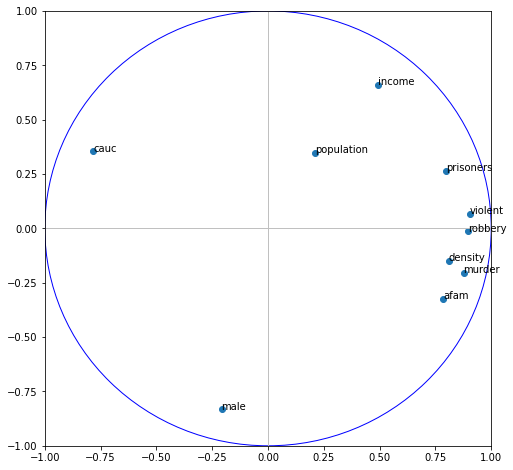

In [ ]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(df.columns[j],(corvar[j,0],corvar[j,1]))
plt.scatter(corvar[:,0],corvar[:,1])
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

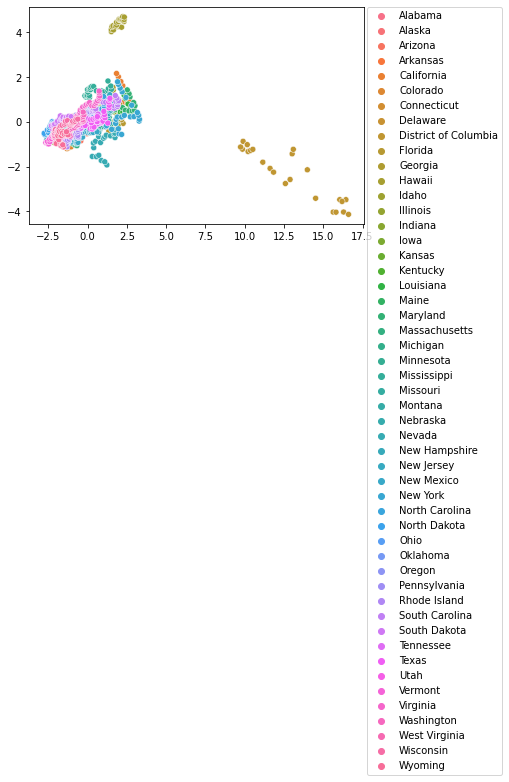

In [ ]:
sns.scatterplot(x=pca_dataZ[:,0],y=pca_dataZ[:,3],hue=dataset['state'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

Les variables (murder, afam, violent, robery, density, prisoniers) sont positivement corrélé avec l'axe 1, donc elles donne une signification a l'axe; l'axe 1 represente la criminalité en général (on peut déduire que afam contribue fortement a la criminalité), densité aussi est fortement lié a la criminalité
La variable cauc est corrélé négativement avec l'axe (le peuple caucasien participe négativement a la criminalité)

population est mal representé par les 2 axes, elle est par contre négativement corrélé avec l'axe 3, se qui donne une segnification a l'axe 3 qui la populasion inversé

male est corrélé negativement avec l'axe 2 se qui signifie que l'axe 2 represente la fiminité (inverse de male)

(on peut dire du 4eme axe qu'il represente l'ethnie) 

**Qualité de représentation des variables (COS²)**

In [ ]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,3]}))

           id              COS2_1              COS2_2              COS2_3
0     violent  0.817386+0.000000j  0.004325+0.000000j  0.033229-0.000000j
1      murder  0.766999+0.000000j  0.041227-0.000000j  0.073522-0.000000j
2     robbery  0.804905+0.000000j  0.000176-0.000000j  0.048512-0.000000j
3   prisoners  0.637447+0.000000j  0.069265+0.000000j  0.000447-0.000000j
4        afam  0.617515+0.000000j  0.105320-0.000000j  0.251732+0.000000j
5        cauc  0.614863-0.000000j  0.125277+0.000000j  0.235559-0.000000j
6        male  0.043333-0.000000j  0.692136-0.000000j  0.014581-0.000000j
7  population  0.044647+0.000000j  0.120699+0.000000j  0.054389+0.000000j
8      income  0.242949+0.000000j  0.437061+0.000000j  0.008718+0.000000j
9     density  0.654163+0.000000j  0.021914-0.000000j  0.118579-0.000000j


**Contribution des variables aux axes (CTR)**

In [ ]:
#contributions
ctrvar = cos2var
for k in range(p):
  ctrvar[:,k] = ctrvar[:,k]/w[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':df.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2]}))


           id               CTR_1               CTR_2               CTR_3
0     violent  0.155865+0.000000j  0.002674+0.000000j  0.042635-0.000000j
1      murder  0.146256+0.000000j  0.025489-0.000000j  0.001459-0.000000j
2     robbery  0.153485+0.000000j  0.000109-0.000000j  0.056111-0.000000j
3   prisoners  0.121553+0.000000j  0.042825+0.000000j  0.048350+0.000000j
4        afam  0.117752+0.000000j  0.065117-0.000000j  0.013640+0.000000j
5        cauc  0.117246-0.000000j  0.077456+0.000000j  0.010895-0.000000j
6        male  0.008263-0.000000j  0.427931-0.000000j  0.099582-0.000000j
7  population  0.008514+0.000000j  0.074626+0.000000j  0.685902-0.000000j
8      income  0.046327+0.000000j  0.270224+0.000000j  0.011375+0.000000j
9     density  0.124740+0.000000j  0.013549-0.000000j  0.030050+0.000000j


In [ ]:
print(np.sum(ctrvar,axis=1))

[1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]


**Etude des individus**

In [ ]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1) # di = ||ti||**2
ddi = pd.DataFrame({'d_i':di})
ddi

,d_i
0,9.597280
1,8.107105
2,7.154813
3,7.023330
4,6.354140
...,...
1168,5.727738
1169,5.934665
1170,6.542818
1171,7.122177


**qualité de représentation des individus -COS2**

In [ ]:
cos2 = pca_dataZ**2
for j in range(p):cos2[:,j] = cos2[:,j]/di
cospd = pd.DataFrame(cos2)
print(cospd)

             0         1         2  ...         7         8         9
0     0.007280  0.582920  0.011724  ...  0.057637  0.002902  0.000042
1     0.007053  0.588740  0.009959  ...  0.053531  0.003194  0.000138
2     0.002244  0.602535  0.006336  ...  0.040611  0.000323  0.000212
3     0.000323  0.635747  0.010048  ...  0.035473  0.000039  0.000123
4     0.000910  0.661928  0.009437  ...  0.018114  0.000807  0.000043
...        ...       ...       ...  ...       ...       ...       ...
1168  0.448795  0.103869  0.171902  ...  0.011648  0.000133  0.006341
1169  0.370659  0.095206  0.172691  ...  0.008945  0.001437  0.006828
1170  0.287835  0.126774  0.171689  ...  0.008404  0.001187  0.004746
1171  0.219924  0.135664  0.168360  ...  0.001782  0.001743  0.003962
1172  0.217559  0.159731  0.157850  ...  0.013342  0.001894  0.002960

[1173 rows x 10 columns]


In [ ]:
#verification
print(np.sum(cos2,axis=1))

[1. 1. 1. ... 1. 1. 1.]


**contributions aux axes**

In [ ]:
ctr = pca_dataZ**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*pca.explained_variance_[j])

print(pd.DataFrame({'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

             CTR_1     CTR_2
0     1.134867e-05  0.002946
1     9.287119e-06  0.002514
2     2.607389e-06  0.002270
3     3.688498e-07  0.002351
4     9.393010e-07  0.002215
...            ...       ...
1168  4.175253e-04  0.000313
1169  3.572910e-04  0.000298
1170  3.058864e-04  0.000437
1171  2.544121e-04  0.000509
1172  2.951512e-04  0.000703

[1173 rows x 2 columns]


In [ ]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[0.99914749 0.99914749 0.99914749 0.99914749 0.99914749 0.99914749
 0.99914749 0.99914749 0.99914749 0.99914749]
